In [1]:
import string
import pandas as pd
import numpy as np
from numpy import linalg as LA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

# 1.1 Carga de Datos
Implemente un método que cargue el set de datos a memoria (puede utilizar la biblioteca pandas para esto).

In [2]:
df = pd.read_csv('titanic.csv')
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


# 1.2. Preprocesamiento y Limpieza de Datos

Revise el contenido del set de datos. Elimine las columnas que considere que no son relevantes para su análisis y utilice documentación interna para justificar su razonamiento. Luego con las columnas restantes elimine cualquier entrada que posea datos faltantes. Utilice one-hot encoding para convertir las variables categóricas en variables numéricas.

> **PassengerId**: No consideramos este dato relevante ya que no nos interesa el Id especifico de cada pasajero. Nuestra intención es analizar tendencias, por eso no nos interesa el Id. Además, como van de 1 -> N, se vuelve redundante mantener estos datos ya que el Id es el número de fila.

> **List item**: No lo consideramos relevante ya que queremos hacer un análisis de tendencias generalizado. No queremos conocer la probabilidad de sobrevencia de una persona basada en su nombre, ya que los nombres tienden a ser casi que únicos. Vale más la pena hacer un análisis de la probabilidad de sobreviviencia basado en la clase social, ya que engloba más casos.

> **Ticket:** Ocurre un análisis similar al de Name y PassengerId. No nos interesa analizar variables que tienden a ser únicas.

> **Cabin**: Al analizar los valores de Cabin vemos que se comporta como un Id. De esta manera, no le vamos a dar relevancia ya que nos interesa la tendencia generalizada de los datos.

> **Embarked**: Consideramos el puerto en donde se embarco irrelevante ya que no aporta mucha importancia saber en que entrada de abordó el Titanic. No consideramos que tiene mucha relevancia conocer esta información ya que no afecta las tendencias de sobrevivir o no.

In [3]:
df.drop(columns=['PassengerId', 'Name',
                     'Ticket', 'Cabin', 'Embarked'], inplace=True)
df.dropna(inplace=True)

df = pd.get_dummies(df, columns=['Pclass', 'Sex'])

df

,Survived,Age,SibSp,Parch,Fare,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male
0,0,22.0,1,0,7.2500,0,0,1,0,1
1,1,38.0,1,0,71.2833,1,0,0,1,0
2,1,26.0,0,0,7.9250,0,0,1,1,0
3,1,35.0,1,0,53.1000,1,0,0,1,0
4,0,35.0,0,0,8.0500,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
1300,1,3.0,1,1,13.7750,0,0,1,1,0
1302,1,37.0,1,0,90.0000,1,0,0,1,0
1303,1,28.0,0,0,7.7750,0,0,1,1,0
1305,1,39.0,0,0,108.9000,1,0,0,1,0


# 1.3. Conversión de tipo de datos
Convierta los datos obtenidos en el punto anterior en una matriz de numpy.

In [4]:
df_numpy = df.to_numpy()
df_numpy

array([[ 0. , 22. ,  1. , ...,  1. ,  0. ,  1. ],
       [ 1. , 38. ,  1. , ...,  0. ,  1. ,  0. ],
       [ 1. , 26. ,  0. , ...,  1. ,  1. ,  0. ],
       ...,
       [ 1. , 28. ,  0. , ...,  1. ,  1. ,  0. ],
       [ 1. , 39. ,  0. , ...,  0. ,  1. ,  0. ],
       [ 0. , 38.5,  0. , ...,  1. ,  0. ,  1. ]])

# 2. myPCA

Implemente una clase llamada myPCA que permita recibir una matriz numpy de datos y obtener la matriz de componentes principales C, así como las inercias y los puntos necesarios para dibujar el círculo de correlación. Este método debe implementarlo usted, por lo que no se permitirá el uso de la biblioteca scikit-learn ni ninguna otra que permita ejecutar PCA de manera directa. Para calcular la matriz C deberá ejecutar los pasos del algoritmo PCA:
Centrar y reducir la matriz

1.   Centrar y reducir la matriz.
2.   Calcular la matriz de correlaciones.
3.   Calcular los valores y vectores propios. Para ello puede serle útil el método numpy.linalg.eigh, que recibe una matriz y retorna sus valores propios y sus vectores propios en forma de matriz.
4.  Ordene los valores y vectores propios de mayor a menor, formando la matriz V.
5. Puede calcular C realizando la multiplicación X * V
6. Las inercia de cada componente principal corresponde a su valor propio dividido entre el total de variables (m).
7. Los puntos necesarios del círculo de correlación corresponden a los valores de la matriz V, en las columnas 0 y 1 para todas las filas. Estos valores deben ir multiplicados por la raíz cuadrada de su valor propio correspondiente.


In [5]:
class myPCA:
    def __init__(self, df, data) -> None:
        self.df = df
        self.data = data
        self.mean_center()

    def mean_center(self):
        for j in range(len(self.data[0])):
            std = np.std(self.data[:, j])
            mean = np.mean(self.data[:, j])
            for i in range(len(self.data)):
                self.data[i][j] = (self.data[i][j] - mean) / std

    def get_r_matrix(self):
        data_transpose = self.data.transpose()
        n = float(len(self.data))
        return (1/n) * data_transpose.dot(self.data)

    def get_eighen_values(self):
        vector, matrix = LA.eigh(self.get_r_matrix())
        return vector, matrix

    def swap_colum(self, arr, start_index, last_index):
        arr[:, [start_index, last_index]] = arr[:, [last_index, start_index]]

    def get_sorted_eighen_matrix(self):
        vector, matrix = self.get_eighen_values()
        for i in range(len(vector)):
            min_idx = i
            for j in range(i+1, len(vector)):
                if vector[min_idx] < vector[j]:
                    min_idx = j

            vector[i], vector[min_idx] = vector[min_idx], vector[i]
            self.swap_colum(matrix, i, min_idx)
        return matrix

    def get_correlation_matrix(self):
        v = self.get_sorted_eighen_matrix()
        self.v = v
        return self.data.dot(v)

In [6]:
titanicPCA = myPCA(df, df_numpy)

# 3.1 Graficación myPCA

Utilice la clase implementada para ejecutar el algoritmo PCA con los datos obtenidos de titanic.csv. Grafique los datos sobre sus componentes principales y coloree los puntos según su valor “Survived”.

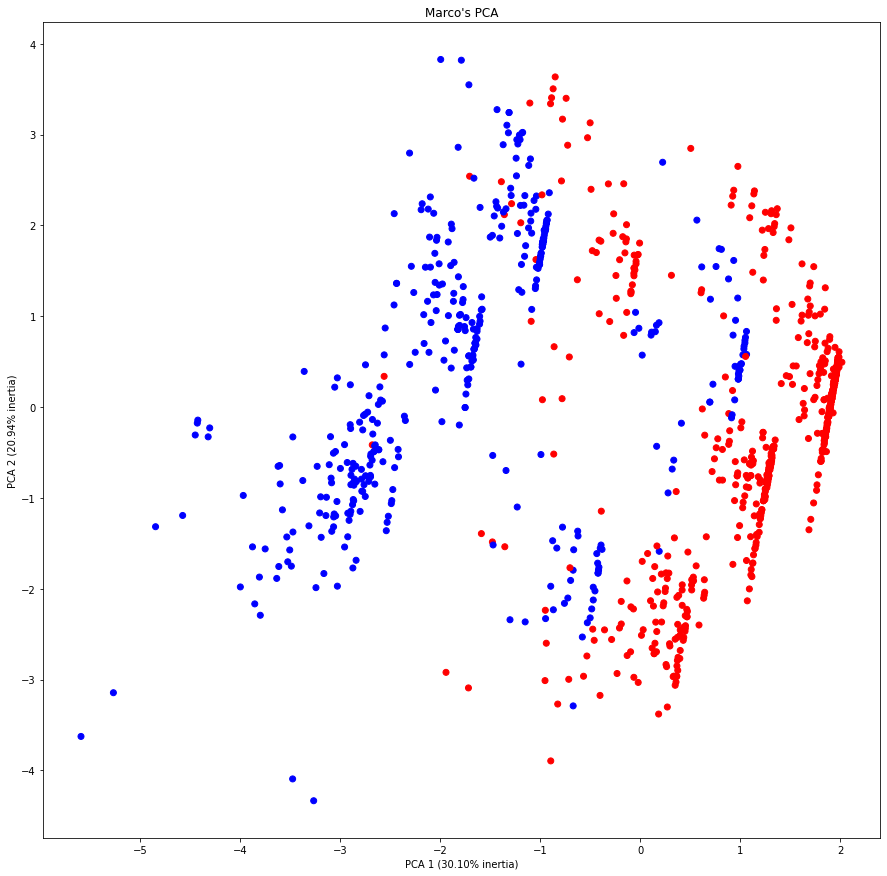

In [16]:
my_eighen_v, my_eighen_m = titanicPCA.get_eighen_values()
my_eighen_v.sort()
my_c = titanicPCA.get_correlation_matrix()

plt.figure(figsize=(15,15))
plt.scatter(np.ravel(my_c[:,0]),np.ravel(my_c[:,1]),c = ['b' if i==1 else 'r' for i in df['Survived']])
plt.xlabel('PCA 1 (%.2f%% inertia)' % ((my_eighen_v[-1]/len(my_eighen_v)) * 100,))
plt.ylabel('PCA 2 (%.2f%% inertia)' % ((my_eighen_v[-2]/len(my_eighen_v)) * 100,))
plt.title('Marco\'s PCA')
plt.show()


# 3.2 Graficación Circulo de Correlación
Grafique el círculo de correlación del modelo.


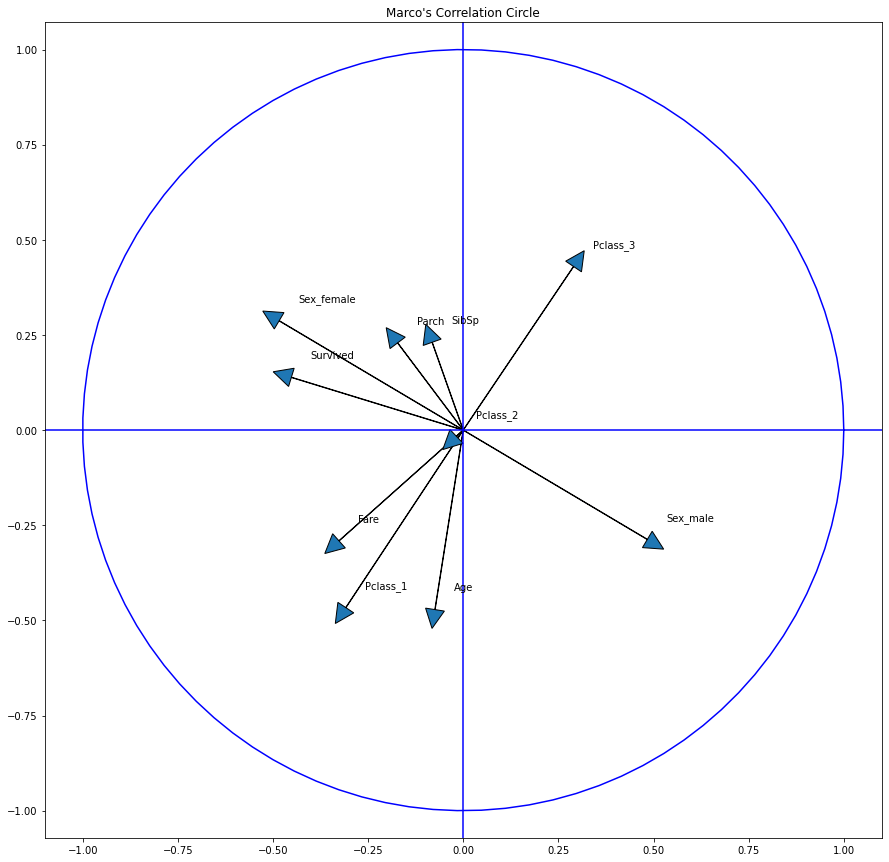

In [10]:
my_v = titanicPCA.get_sorted_eighen_matrix()

plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
    plt.arrow(0,0, my_v[i, 0],  # x - PC1
                  my_v[i, 1],  # y - PC2
                  head_width=0.05, head_length=0.05)
    plt.text(my_v[i, 0] + 0.05, my_v[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b")  # Circle
plt.axis('equal')
plt.title('Marco\'s Correlation Circle')
plt.show()


# 3.3 Análisis de Resultados
## ¿Cuántos grupos de datos parece haber?
> Viendo el comportamiento de la gráfica de PCA, notamos que hay 2 grupos de datos. Los datos de las personas que no sobrevivieron parece que tienden a concentrarse en la derecha de la gráfica, mientras que el resto de datos no. Aunque hay una clara separación, parece existir pequeñas excepciones.
##  ¿Qué comportamientos se pueden observar?
>  Podemos observar que los primeros 2 componentes manejan un total del 55% de la información. Podemos observar que las condiciones para que alguien no haya sobrevivido son muy similares, a diferencia de los que si sobrevivieron. Esto lo podemos deducir ya que los puntos rojos se concentran y parecen tener una concentración muy homogenia, aunque hayan puntos azules que se traslapan.
## ¿Qué podría explicar estos comportamientos?
> Algo que podria explicar estos comportamientos son las caracteristicas de cada individuo del data set. Para ver las relaciones lo mejor es ver el circulo de correlaciones.
## ¿Qué nos indica el círculo de correlación?
> El circulo de correlaciones nos indica que tan correlacionadas estan las variables entre si, y con que magnitud.
## Si yo fuera un pasajero del Titanic, ¿qué atributos o características maximizarían mi probabilidad de sobrevivencia?
> Interpretando los gráficos, podemos deducir que si fueramos una mujer abordo del titanic que viaja en primera clase y tuviera padres de familia o esposo, maximizaria nuestra probabilidad de sobrevivencia. Podemos deducir esto debido al comportamiento y dirección de dónde apuntas las flechas en el circulo, y de donde se ubican los puntos azules en el scatter plot.

# 4.1 Graficación PCA scikit-learn
Por motivos de verificación, repita el experimento pero esta vez utilizando la
biblioteca scikit-learn (sklearn). Nuevamente, vuelva a cargar el documento y
realice el proceso para ejecutar el algoritmo haciendo uso de la poderosa biblioteca sklearn. Grafique nuevamente los datos sobre sus componentes principales haciendo uso del coloreo.

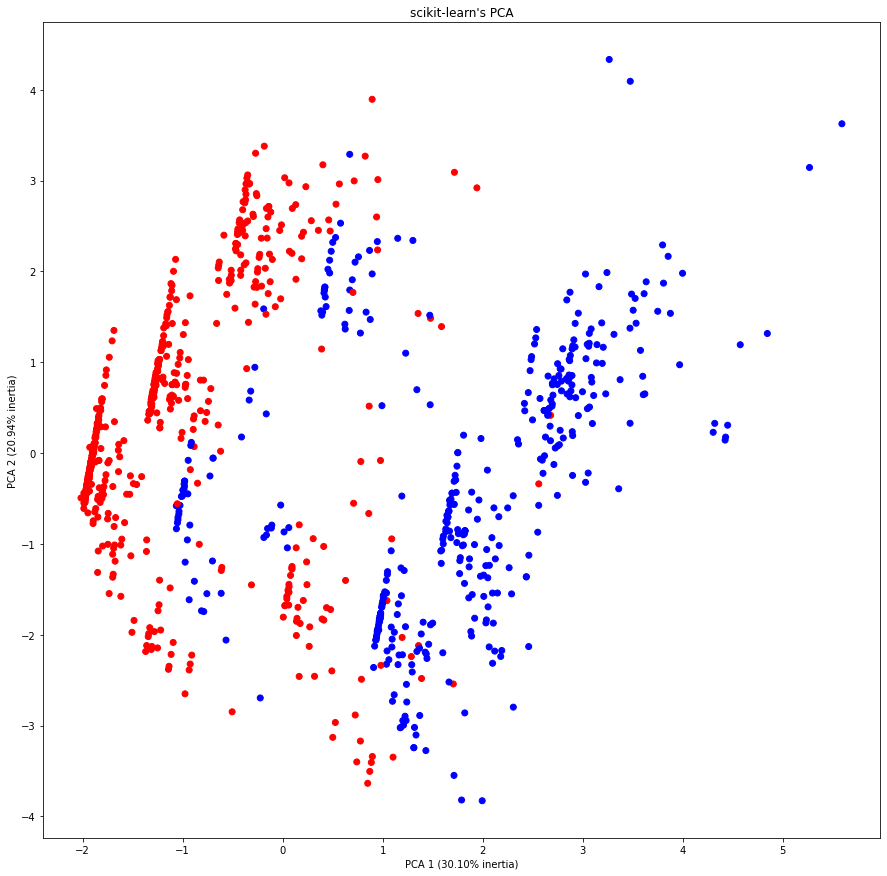

In [11]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA()
C = pca.fit_transform(df_scaled)
inertia = pca.explained_variance_ratio_

plt.figure(figsize=(15,15))
plt.scatter(np.ravel(C[:, 0]), np.ravel(C[:, 1]), c=['b' if i == 1 else 'r' for i in df['Survived']])
plt.title("scikit-learn\'s PCA")
plt.xlabel('PCA 1 (%.2f%% inertia)' % (inertia[0] * 100,))
plt.ylabel('PCA 2 (%.2f%% inertia)' % (inertia[1] * 100,))
plt.show()

# 4.2 Graficación Circulo de Correlación scikit-learn
También grafique el círculo de correlación del modelo

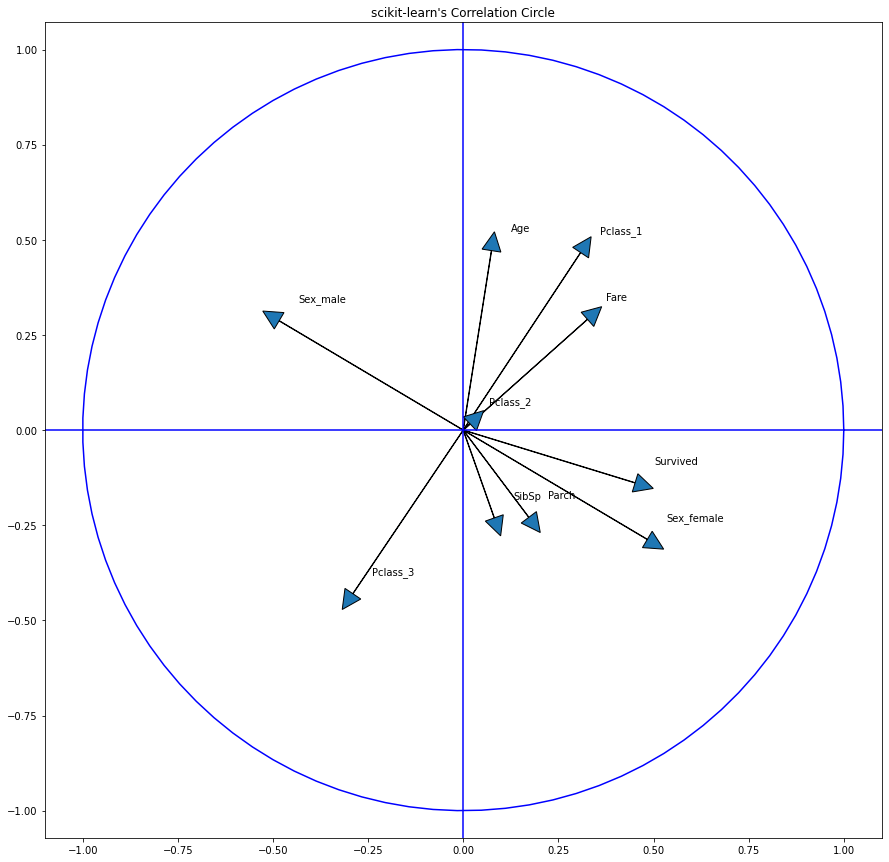

In [15]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)
pca = PCA()
C = pca.fit_transform(df_scaled)
V = pca.transform(np.identity(df_scaled.shape[1]))

plt.figure(figsize=(15,15))
plt.axhline(0, color='b')
plt.axvline(0, color='b')
for i in range(0, df.shape[1]):
    plt.arrow(0,0, V[i, 0],  # x - PC1
                  V[i, 1],  # y - PC2
                  head_width=0.05, head_length=0.05)
    plt.text(V[i, 0] + 0.05, V[i, 1] + 0.05, df.columns.values[i])
an = np.linspace(0, 2 * np.pi, 100)
plt.plot(np.cos(an), np.sin(an),color="b")  # Circle
plt.axis('equal')
plt.title('scikit-learn\'s Correlation Circle')
plt.show()

# 4.3 Análisis de Resultados
## ¿Hay alguna diferencia entre las gráficas?
> Si, viendo los gráficos podemos ver una diferencia muy evidente; parece que los gráficos estan reflejados.
## De ser así, ¿por qué cree que ocurrió esto?
> Esto puede ser un resultado de la forma en que `sci-kit learn` genera los cálculos de vectores y valores propios. Al analizar con mayor profundidad los valores de las matrices de correlaciones, podemos notar que varios de los valores tienen el signo opuesto, pero mantienen el mismo valor absoluto.
## ¿Impacta el resultado de alguna manera?
No, no impacta el resultado. Esto se debe a que, como hemos visto en clase, si un valor o vector propio tienen un valor negativo se van a reflejar en direccion opuesta. Sin embargo, a nosotros lo que nos interesa son la relaciones entre valores, entonces, aunque un gráfico esté reflejado va a mantener su relación o diferencia entre los puntos.